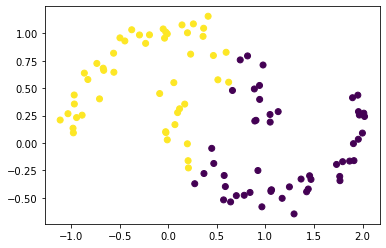

In [196]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

two_moon=datasets.make_moons(n_samples=100,noise=0.1)
X3=two_moon[0]
KM3=KMeans(n_clusters=2,init='random',random_state=5)
KM3.fit(X3)
x=KM3.predict(X3)
plt.scatter(X3[:,0],X3[:,1],c=list(x))

In [224]:
import numpy as np

class Clustering(object):
    
    def __init__(self): pass
    
    # ----- Parameter -----
    # x : Data matrix
    # c : The number of cluster
    # m : The number of subcluster
    # k : The number of neighbor points
    
    
    def k_multiple_means(x,c,m,k):
        
        iterTimes=1000             #迭代次數
        n=np.size(x,axis=0)        #共有幾筆資料
        dim=np.size(x,axis=1)      #每筆資料的維度

        A = np.random.random([m,dim])    #亂數產生k個dim維度的值 ----------- (initial) The prototype matrix 
        
        #dist：distance matrix(initial)
        dist=np.array(np.zeros([n,m]))    
            
        #S：connection probability matrix(initial)
        S=np.array(np.ones([n,m]))    
        
        for count_iter in range(iterTimes):               
            
            #--------(方案一)求 Data point 與 Prototype 的距離 找出 index--------
#             for i in range(m):
#                 c=A[i]                                 #取得prototype座標
#                 dist[:,i] = np.linalg.norm(x-c,axis=1) #求 L2-norm，每次進來跑 n 筆資料與 “ 第 k 個 “ prototype 距離
                
#             A_index=dist.argmin(axis=1)                # argmin 取得能使值達到最小的（axis=1列的index）
            
            #--------(方案二)直接用k-means找出初始index
            
            KM=KMeans(n_clusters=m,init='random',random_state=6)
            KM.fit(x)
            A_index=list(KM.predict(x))                            #A_index : 紀錄 Data point 屬於哪個 Prototype
            
            old_A=np.copy(A)
            
            #--------替代 aij-------- 
            for j in range(m):
                mux=0
                muy=0
                for i in range(n):
                    if A_index[i]==j:
                        mux=mux+x[i][0]
                        mux=mux*S[i][j]
                        
                        muy=muy+x[i][1]
                        muy=muy*S[i][j]
                        
                A[j][0]=mux/np.sum(S[i][j])
                A[j][1]=muy/np.sum(S[i][j])
                
             
            #--------判斷收斂--------
            th=np.linalg.norm(A-old_A)                       #計算兩個prototype的距離

            if th<np.spacing(1):                             #電腦區分兩個數的差的最小精度，當兩個數的差小於這個值，則電腦認為兩個數相等
                break
        
        #--------不到為什麼出來還要重做一次，不然會拿到每次迭代的值--------
        for j in range(m):
                mux=0
                muy=0
                for i in range(n):
                    if A_index[i]==j:
                        mux=mux+x[i][0]
                        mux=mux*S[i][j]
                        
                        muy=muy+x[i][1]
                        muy=muy*S[i][j]
                        
                A[j][0]=mux/np.sum(S[i][j])
                A[j][1]=muy/np.sum(S[i][j]) 
        #--------做完約束的 mm ，就是 A_index
        
        return A,A_index

In [ ]:
def meanIdex(x,A_index,m,S):
    
    #功能：更新 Aij ，也就是 Prototype(座標) ----------> 對應公式（5）
    #----- Parameter -----
    #x : Data Point
    #A_index : 紀錄 Data point 屬於哪個 Prototype (Label值)
    #m : sub-cluster(prototype)數量
    
    

[[-10.48121613  28.77990826]
 [ 61.70475256  -3.55135368]]


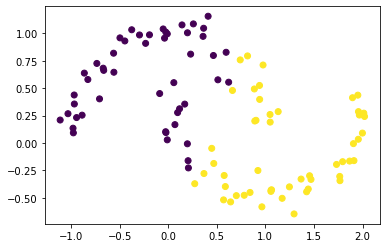

In [225]:
x=Clustering.k_multiple_means(X3,4,2,1)
plt.scatter(X3[:,0],X3[:,1],c=x[1])

In [ ]:
def CLR(x,c,A,k,y,l):
    
    # ----- Parameter -----
    # x : Data matrix
    # c : The number of cluster
    # A : The prototype matrix
    # k : The number of neighbor points
    
    
    

In [227]:
def ConstructA_NP(x,A,k=5,isSparse=1):
    
    n=np.size(x)     #計算 Data point 數量
    m=np.size(A)     #計算 Prototype 數量
    
    dis=np.zeros([n,m])
    
    for i in range(m):
        c=A[i]
        print(c)
        dis[:,i] = np.linalg.norm(x-c,axis=1)
    print(dis)
    

In [228]:
ConstructA_NP(X3,x[0])

[-10.48121613  28.77990826]


ValueError: could not broadcast input array from shape (100) into shape (200)